In [158]:
import numpy as np 
import pandas as pd

In [159]:
# checking jupyter notebook
print('hello world')


hello world


In [160]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [161]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [162]:
#cleaning data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [163]:
df.shape

(5572, 5)

In [164]:
# dropping null values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [165]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)



In [167]:
# making target a binary vector
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.head(5)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
encoder.fit_transform(df['target'])


array([0, 0, 1, ..., 0, 0, 0])

In [169]:
df.target=encoder.fit_transform(df.target)

In [170]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [171]:
# inplace paramter is used to change the value in real database
df.drop_duplicates(keep='first', inplace=True)

In [172]:
df.duplicated().sum()

0

In [173]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

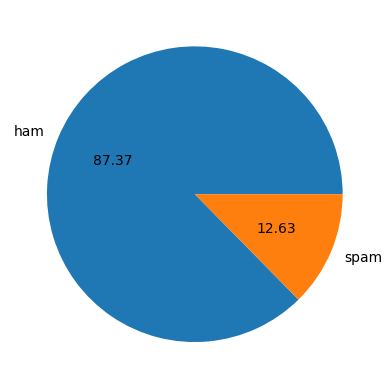

In [174]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [175]:
# natural language processing begins 

In [176]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [177]:
import nltk

In [178]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ramendra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
#  finding count of words and character and sentences

In [180]:
df['no_characters']= df['text'].apply(len)


In [181]:
df.head(5)

,target,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [182]:
df['no_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [183]:
df.head(10)

,target,text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [184]:
# no of sentences
df['no_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [185]:
df.head(5)

,target,text,no_characters,no_words,no_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [186]:
df[['no_characters', 'no_words','no_sent']]

,no_characters,no_words,no_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [187]:
df[['no_characters', 'no_words','no_sent']].describe()

,no_characters,no_words,no_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [188]:

# ham
df[df['target']==0][['no_characters', 'no_words','no_sent']].describe()

,no_characters,no_words,no_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [189]:
# spam
df[df['target']==1][['no_characters', 'no_words','no_sent']].describe()

,no_characters,no_words,no_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [190]:
import seaborn as sns

<Axes: xlabel='no_characters', ylabel='Count'>

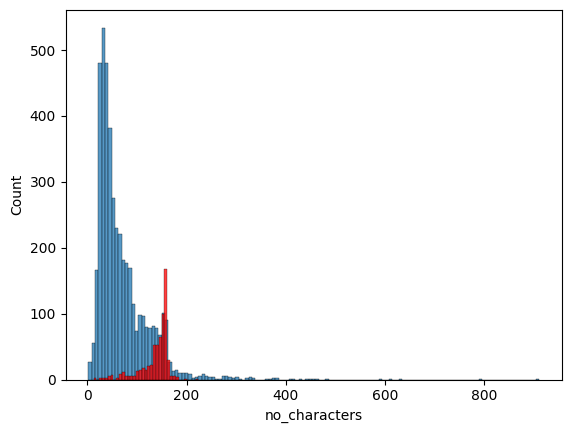

In [191]:
sns.histplot(df[df['target']==0]['no_characters'])
sns.histplot(df[df['target']==1]['no_characters'], color='red')

In [192]:
#  it shows that data contain outliers

In [193]:
# corelations between sentences and words

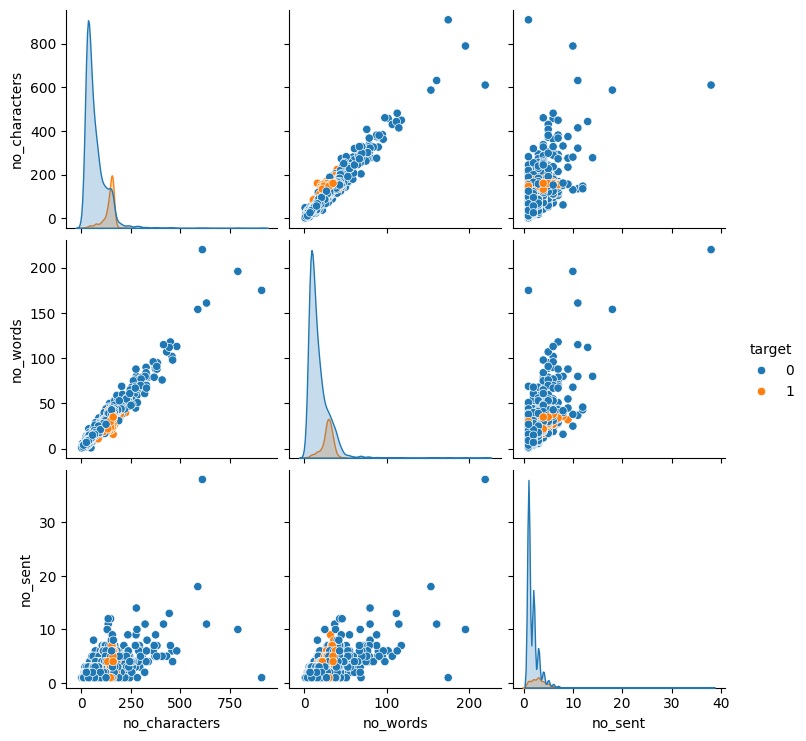

In [194]:
sns.pairplot(df, hue='target')
plt.show()

/tmp/ipykernel_230590/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

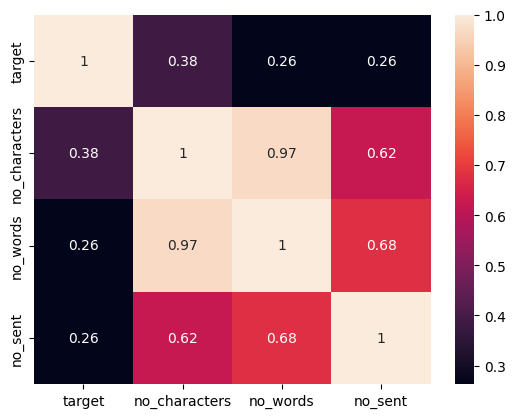

In [195]:
sns.heatmap(df.corr(), annot=True)

In [196]:
#  starting data preprocessing
# converting to lowercase
# tokenization
# removing special characters(like )
# removing stop words and punctutation (is , am ,are)
# stemming(danced->dance)

In [197]:
# ramving special characters
def transform_text(text):
 text=text.lower()
 text=nltk.word_tokenize(text)
 y=[]
 for i in text:
     if i.isalnum():
      y.append(i)
 return y;

In [198]:
transform_text('hi how are you 20%% year old')

['hi', 'how', 'are', 'you', '20', 'year', 'old']

In [199]:
def transform_texts(text):
 text=text.lower()
 text=nltk.word_tokenize(text)
 y=[]
 for i in text:
     if i.isalnum():
      y.append(i)
 text=y[:] #if done by direct assignment it will copy reference
 y.clear()
 for i in text:
     if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)
 text=y[:]
 y.clear()
 for i in text:
     y.append(ps.stem(i)+" ")
    

 return "".join(y);

In [200]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ramendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [201]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [202]:
transform_texts('hi this is my ml project')

'hi ml project '

In [203]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [204]:
# bringing to root value
ps.stem('dancing')

'danc'

In [205]:
transform_texts('I love doing machine Learning what about you')

'love machin learn '

In [206]:
df['transform_text']=df.text.apply(transform_texts)

In [207]:
df.head()

,target,text,no_characters,no_words,no_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [208]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 511 kB 2.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [209]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [210]:
len(spam_corpus)

9939

In [211]:
from collections import Counter

In [212]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [213]:
# model implementation using naive bayes

In [214]:
# converting the words into the vectors

In [215]:
pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [216]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)#optimising no of words

In [217]:
X=tf.fit_transform(df['transform_text']).toarray()

In [218]:
X.shape


(5169, 3000)

In [219]:
y=df['target'].values

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)


In [222]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [223]:
#  making instance of each type 
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [224]:
# very low predicitivity gaussian
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [225]:
# multinomial
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))

print(precision_score(y_test,y_pred))




print(confusion_matrix(y_test,y_pred))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [226]:
bnb.fit(X_train, y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [227]:
# using tfidiff

In [228]:
import pickle

In [231]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))